##순서도
0. 키워드를 받음
1. 키워드에 따라서 뉴스, 커뮤니티 빈도수를 확인
2. 키워드에서 뉴스(제목, 본문, 제목+본문)
3. 커뮤니티(제목 or 본문에서 추출) + 감성분석(제목, 본문, 제목+본문)_3가지 경우로 코드 만들기
4. 음영 & 긍/부정(10,7,5...3) /

key: 뉴스 빈도수, 커뮤니티 빈도수, 뉴스 감성분석, 커뮤니티 감성분석, 최종 RGB

변경해야 할 상황
1.감성분석(제목, 본문, 제목+본문)3가지 코드 작성
2.불용어처리 다시 하기

In [ ]:
import pandas as pd
import numpy as np
from collections import defaultdict

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
All_news = pd.read_csv("/content/drive/MyDrive/데이터청년캠퍼스/데이터/데이터 전처리 완료/news_final.csv")
All_news[["title", "keyword"]]

,title,keyword
0,호남대 여교수회 광주아동복지협회에 후원금 전달,"보호아동,광주아동복지협회,호남대학교,지역사회,아동복지시설,자립역량,광주,후원금,협회..."
1,광주 동부소방서 제46대 송민영 서장 취임,"광주,송민영,소방서,소방서장,동부소방서,동부소방서장,안전본부,동구민,지휘력,구조단장..."
2,한국섬진흥원 섬 주민에온정의 손길,"한국섬진흥원,오동호,압해도,장애인복지시설,9개,한국섬,광주신세계,코로나19,겨울철,..."
3,새해특집 남도음식축제 국제화 남도음식문화큰잔치 국내 최초 국제축제 추진,"남도,전남도,외국인,국제행사,남도음식,국제화,남도음식문화큰잔치,생산량,국제관,관광객..."
4,담양청소년지도위원협의회 모범청소년 무궁화 장학금 전달,"장학금,전달식,협의회,담양청소년지도위원협의회,서생현,청소년들,담양,장학생,지도위원협..."
...,...,...
1857443,용인특례시 11월10일까지 주민등록 조사 실시 출생 미등록 확인,"주민등록,용인,용인특례시,학령기,특례시,만큼,대상자,비대면,보건복지부,복지취약,불명..."
1857444,부천시 민원상담 챗봇시대 개막 365일 24시간 비대면 서비스 도입,"챗봇,부천시,민원상담,콜센터,관계자,효율성,일대일,행정복지센터,시민들,카카오톡,부천..."
1857445,동양화 두고 충돌 교차하는 시선 아아 동양화 이미 항상 변화 전시리뷰,"동양화,작가들,동양,파주,전시장,동시대,손동현,이진주,이성민,전시실,권순영,정재호,..."
1857446,동생 13차례 찌른 범인에게 사형을 신림역 유족 울분,"신림역,피의자,조씨,김씨,피해자,서울,생활비,영장심사,난동범,남동생,서울중앙지법,고..."


In [ ]:
#키워드 목록
words = ["반도체", "에너지", "배터리"] #임의로 작성함

In [ ]:
#사전 초기화
# test["keyword","news_fre", "com_fre", "news_sen", "com_sen","rgb"]#keyword, 뉴스빈도수, 커뮤니티빈도수, 뉴스 감성분석, 커뮤니티 감성분석, rgn
test = defaultdict(list) #초기화
test["keyword"] = []
test["news_fre"] = []
test["com_fre"] = []
test["news_sen"] = []
test["com_sen"] = []
test["rgb"] = []

In [ ]:
#커뮤니티 데이터 합치기
fm = pd.read_csv("/content/drive/MyDrive/데이터청년캠퍼스/데이터/데이터 전처리 완료/fm_final.csv")
kor = pd.read_csv("/content/drive/MyDrive/데이터청년캠퍼스/데이터/데이터 전처리 완료/kor_invite_final.csv")
val = pd.read_csv("/content/drive/MyDrive/데이터청년캠퍼스/데이터/데이터 전처리 완료/val_invite_final.csv")
fm[["title", "content"]]
kor[["title", "content"]]
val[["title", "content"]]
com_data = pd.concat([fm,kor,val], ignore_index=True)#커뮤니티 데이터 합(fm, korea, value)
com_data

,Unnamed: 0,title,content
0,0,7월 27일 외인 기관 수급 특이점 오늘은 많이 깁니다,7월 27일 외인 기관 수급 특이점 요약 2차전지 오늘도 하락 대신 반도체가 빈자리...
1,2,미 2분기 GDP 24 성장예상치 상회,침체는 없는걸루
2,3,27일 지표 발표 실업수당 GDP 물가 등,신속렉카 5포 줍줍
3,4,2차전지 수익금으로 부모님 저녁 대접했습니다,운이 좋게 거의 250만원 수익을 봤습니다 그래서 마침 예수금이 들어와서 오늘 저녁...
4,5,다 지나고나서 분석하는건 정말 쉽다요,가격에따라 또 뷰가 바뀌는구나
...,...,...,...
21558,8504,대한민국에서 30년간 40배 배당 성장 시킨 회사,\n\n\n\n\n\n\n\n\n\n제목 그대로 이런 회사가 있어서 놀랐습니다\n\...
21559,8505,저평가 우량주 송원산업 재무분석 가치평가,\n\n\n\n\n\n\n\n\n\nhttpsblognavercom1jin42229...
21560,8506,22년 12월 그리고 2022년 투자를 마치고,\n\n\n\n\n\n\n\n\n\n2212월 그리고 다사다난했던 2022년을 복기...
21561,8508,리포트 용어 관련해서 질문드립니다,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...


##불용어처리 안함 -> 불용어 사전만들고 다시 돌리기

In [ ]:
for word in words:
  #news 데이터
  filtered_news = All_news[All_news["keyword"].str.contains(word, na=False)] #"특성추출(가중치순 상위 50개)"에서 "word" 값만 가져오기
  #filtered_data word 키워드만 가져오기
  filtered_news[["title", "keyword"]]#"word"로 필터링 한 값만 가져옴
  news_count = len(filtered_news) #1대 분류 / 전체 대 분류
  print(f"news_{word}_빈도수 : {news_count}") #1대분류 / 전체 대 분류

  #커뮤니티 데이터
  filtered_com = com_data[com_data["content"].str.contains(word, na=False)]
  com_num = len(filtered_com)
  print(f"com_{word}_빈도수 : {com_num}")

  test["keyword"].append(word)
  test["news_fre"].append(news_count)
  test["com_fre"].append(com_num)
  print(test)

news_반도체_빈도수 : 44037
com_반도체_빈도수 : 1241
defaultdict(<class 'list'>, {'keyword': ['반도체', '에너지', '배터리', '반도체'], 'news_fre': [44037, 18596, 3720, 44037], 'com_fre': [1241, 812, 430, 1241], 'news_sen': [], 'com_sen': [{'긍정': 248, '중립': 822, '부정': 171}, {'긍정': 164, '중립': 507, '부정': 141}, {'긍정': 93, '중립': 289, '부정': 48}], 'rgb': []})
news_에너지_빈도수 : 18596
com_에너지_빈도수 : 812
defaultdict(<class 'list'>, {'keyword': ['반도체', '에너지', '배터리', '반도체', '에너지'], 'news_fre': [44037, 18596, 3720, 44037, 18596], 'com_fre': [1241, 812, 430, 1241, 812], 'news_sen': [], 'com_sen': [{'긍정': 248, '중립': 822, '부정': 171}, {'긍정': 164, '중립': 507, '부정': 141}, {'긍정': 93, '중립': 289, '부정': 48}], 'rgb': []})
news_배터리_빈도수 : 3720
com_배터리_빈도수 : 430
defaultdict(<class 'list'>, {'keyword': ['반도체', '에너지', '배터리', '반도체', '에너지', '배터리'], 'news_fre': [44037, 18596, 3720, 44037, 18596, 3720], 'com_fre': [1241, 812, 430, 1241, 812, 430], 'news_sen': [], 'com_sen': [{'긍정': 248, '중립': 822, '부정': 171}, {'긍정': 164, '중립': 507, '부정': 141}, {'긍

##훈련 후 감성분석 진행하기

In [ ]:
!pip install mxnet
!pip install gluonnlp==0.9.2
!pip install tqdm pandas
!pip install sentencepiece
!pip install transformers
!pip install torch

!pip install 'git+https://github.com/SKTBrain/KoBERT.git#egg=kobert_tokenizer&subdirectory=kobert_hf'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 11.9 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.7/252.7 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gluonnlp: filename=gluonnlp-0.9.2-cp310-cp310-linux_x86_64.whl size=530310 sha256=14f74258631363568b1a68413102a32d70559a19f2fd63fc678f0b1d64fc5ab2
  Stored in directory: /root/.cache/pip/wheels/75/6b/7a/5dd90858c2e637bb3cc7ff492834d84a837a64f07bc0ac86fb
Successfully built gluonnlp
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 71.4 MB/s eta 0:00:00
     ━━━━━━━━━

In [ ]:
import pandas as pd
import numpy as np
import urllib.request
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup

In [ ]:
DATASET_URL = "https://raw.githubusercontent.com/ukairia777/finance_sentiment_corpus/main/finance_data.csv"
DATASET_NAME = "finance_data.csv"

In [ ]:
urllib.request.urlretrieve(DATASET_URL,
                           filename = DATASET_NAME
                           )

('finance_data.csv', <http.client.HTTPMessage at 0x7e308261dd80>)

In [ ]:
dataset = pd.read_csv(DATASET_NAME)
dataset.head()

,labels,sentence,kor_sentence
0,neutral,"According to Gran, the company has no plans to...","Gran에 따르면, 그 회사는 회사가 성장하고 있는 곳이지만, 모든 생산을 러시아로..."
1,neutral,Technopolis plans to develop in stages an area...,테크노폴리스는 컴퓨터 기술과 통신 분야에서 일하는 회사들을 유치하기 위해 10만 평...
2,negative,The international electronic industry company ...,"국제 전자산업 회사인 엘코텍은 탈린 공장에서 수십 명의 직원을 해고했으며, 이전의 ..."
3,positive,With the new production plant the company woul...,새로운 생산공장으로 인해 회사는 예상되는 수요 증가를 충족시킬 수 있는 능력을 증가...
4,positive,According to the company's updated strategy fo...,"2009-2012년 회사의 업데이트된 전략에 따르면, Basware는 20% - 4..."


In [ ]:
dataset['labels'] = dataset['labels'].replace(['neutral', 'positive', 'negative'],[0, 1, 2])
dataset.head()

,labels,sentence,kor_sentence
0,0,"According to Gran, the company has no plans to...","Gran에 따르면, 그 회사는 회사가 성장하고 있는 곳이지만, 모든 생산을 러시아로..."
1,0,Technopolis plans to develop in stages an area...,테크노폴리스는 컴퓨터 기술과 통신 분야에서 일하는 회사들을 유치하기 위해 10만 평...
2,2,The international electronic industry company ...,"국제 전자산업 회사인 엘코텍은 탈린 공장에서 수십 명의 직원을 해고했으며, 이전의 ..."
3,1,With the new production plant the company woul...,새로운 생산공장으로 인해 회사는 예상되는 수요 증가를 충족시킬 수 있는 능력을 증가...
4,1,According to the company's updated strategy fo...,"2009-2012년 회사의 업데이트된 전략에 따르면, Basware는 20% - 4..."


In [ ]:
dataset[dataset['kor_sentence'].duplicated()]

,labels,sentence,kor_sentence
79,positive,TELECOMWORLDWIRE-7 April 2006-TJ Group Plc sel...,텔레콤월드와이어-2006년 4월 7일-TJ 그룹은 모닝 디지털 디자인 Oy 핀란드 ...
789,neutral,The Group's business is balanced by its broad ...,그룹의 사업은 스포츠의 광범위한 포트폴리오와 모든 주요 시장에서의 입지에 의해 균형...
1099,neutral,The issuer is solely responsible for the conte...,이 발표 내용에 대한 책임은 전적으로 발행자에게 있습니다.
1394,neutral,"The Lemminkainen Group, headquartered in Helsi...","핀란드 헬싱키에 본사를 둔 레민카이넨 그룹은 토목 공학, 건축 계약, 기술 건축 서..."
1416,neutral,The report profiles 614 companies including ma...,"이 보고서는 블랙 앤 데커, 피스카스, 피스카스 브랜드, 후스크바르나 아웃도어 프로..."
2396,neutral,Ahlstrom's share is quoted on the NASDAQ OMX H...,알스트롬의 주가는 나스닥 OMX 헬싱키에서 인용되고 있다.
2567,neutral,SSH Communications Security Corporation is hea...,SSH 통신 보안 코퍼레이션은 핀란드 헬싱키에 본사를 두고 있다.
2889,neutral,Financial details were not disclosed.,재정적인 세부사항은 공개되지 않았다.
2890,neutral,Financial details were n't disclosed.,재정적인 세부사항은 공개되지 않았다.
2892,neutral,Financial terms were n't disclosed.,금융 조건은 공개되지 않았다.


In [ ]:
dataset.drop_duplicates(subset = ['kor_sentence'], inplace = True)
dataset.shape

(4827, 3)

Text(0, 0.5, 'Number')

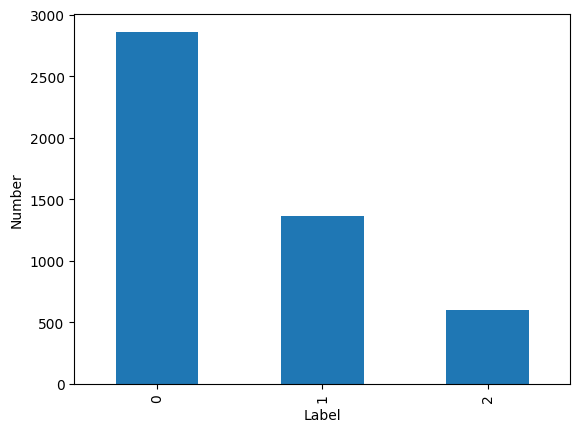

In [ ]:
dataset['labels'].value_counts().plot(kind = 'bar')
plt.xlabel("Label")
plt.ylabel("Number")

Text(0, 0.5, 'Ratio')

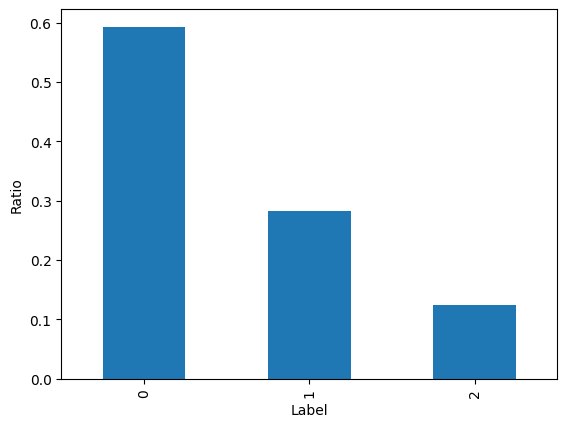

In [ ]:
dataset['labels'].value_counts(normalize = True).plot(kind = 'bar', )
plt.xlabel("Label")
plt.ylabel("Ratio")

In [ ]:
dataset['labels'].value_counts(normalize = True)

0    0.592708
1    0.282163
2    0.125129
Name: labels, dtype: float64

In [ ]:
X_data = dataset['kor_sentence']
y_data = dataset['labels']

In [ ]:
length = [(len(x)) for x in X_data]

In [ ]:
sum(length)/ len(length)


60.84358814998964

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,
                                                    test_size = 0.2,
                                                    random_state = 0,
                                                    stratify = y_data)

In [ ]:
data_train = []
for q, label in zip(X_train, y_train):
    data = []
    data.append(q)
    data.append(str(label))

    data_train.append(data)

data_test = []
for q, label in zip(X_test, y_test):
    data = []
    data.append(q)
    data.append(str(label))

    data_test.append(data)

In [ ]:
k = pd.DataFrame(data_train)
k.shape

(3861, 2)

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gluonnlp as nlp
import numpy as np
from tqdm import tqdm, tqdm_notebook

In [ ]:
from kobert_tokenizer import KoBERTTokenizer
from transformers import BertModel

from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup

In [ ]:
device = torch.device("cuda")

In [ ]:
tokenizer = KoBERTTokenizer.from_pretrained('skt/kobert-base-v1')
bertmodel = BertModel.from_pretrained('skt/kobert-base-v1', return_dict=False)
vocab = nlp.vocab.BERTVocab.from_sentencepiece(tokenizer.vocab_file, padding_token='[PAD]')

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'XLNetTokenizer'. 
The class this function is called from is 'KoBERTTokenizer'.


In [ ]:
class BERTDataset(Dataset):
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer, vocab, max_len,
                 pad, pair):
        transform = nlp.data.BERTSentenceTransform(
            bert_tokenizer, max_seq_length=max_len, vocab=vocab, pad=pad, pair=pair)

        self.sentences = [transform([i[sent_idx]]) for i in dataset]
        self.labels = [np.int32(i[label_idx]) for i in dataset]

    def __getitem__(self, i):
        return (self.sentences[i] + (self.labels[i], ))

    def __len__(self):
        return (len(self.labels))

In [ ]:
max_len = 64
batch_size = 64
warmup_ratio = 0.1
num_epochs = 10
max_grad_norm = 1
log_interval = 200
learning_rate =  5e-5

In [ ]:
tok = tokenizer.tokenize

data_train = BERTDataset(data_train, 0, 1, tok, vocab, max_len, True, False)
data_test = BERTDataset(data_test, 0, 1, tok, vocab, max_len, True, False)

In [ ]:
train_dataloader = torch.utils.data.DataLoader(data_train, batch_size=batch_size, num_workers=2)
test_dataloader = torch.utils.data.DataLoader(data_test, batch_size=batch_size, num_workers=2)

In [ ]:
class BERTClassifier(nn.Module):
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 num_classes=3,
                 dr_rate=None,
                 params=None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate

        self.classifier = nn.Linear(hidden_size , num_classes)
        if dr_rate:
            self.dropout = nn.Dropout(p=dr_rate)

    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)

        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), attention_mask = attention_mask.float().to(token_ids.device))
        if self.dr_rate:
            out = self.dropout(pooler)
        return self.classifier(out)

In [ ]:
model = BERTClassifier(bertmodel,  dr_rate=0.5).to(device) #모델 오류나면 코랩 gpu인지 확인

In [ ]:
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

In [ ]:
optimizer = torch.optim.AdamW(optimizer_grouped_parameters, lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

t_total = len(train_dataloader) * num_epochs
warmup_step = int(t_total * warmup_ratio)

scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=warmup_step, num_training_steps=t_total)

In [ ]:
def calc_accuracy(X,Y):
    max_vals, max_indices = torch.max(X, 1)
    train_acc = (max_indices == Y).sum().data.cpu().numpy()/max_indices.size()[0]
    return train_acc

In [ ]:
for e in range(num_epochs):
    train_acc = 0.0
    test_acc = 0.0
    model.train()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):
        optimizer.zero_grad()
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        loss = loss_fn(out, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        optimizer.step()
        scheduler.step()  # Update learning rate schedule
        train_acc += calc_accuracy(out, label)
        if batch_id % log_interval == 0:
            print("epoch {} batch id {} loss {} train acc {}".format(e+1, batch_id+1, loss.data.cpu().numpy(), train_acc / (batch_id+1)))
    print("epoch {} train acc {}".format(e+1, train_acc / (batch_id+1)))
    model.eval()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        test_acc += calc_accuracy(out, label)
    print("epoch {} test acc {}".format(e+1, test_acc / (batch_id+1)))

<ipython-input-39-e6a38b13095b>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):


  0%|          | 0/61 [00:00<?, ?it/s]

epoch 1 batch id 1 loss 1.0289356708526611 train acc 0.46875
epoch 1 train acc 0.6047033567525371


<ipython-input-39-e6a38b13095b>:22: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):


  0%|          | 0/16 [00:00<?, ?it/s]

epoch 1 test acc 0.7711588541666666


  0%|          | 0/61 [00:00<?, ?it/s]

epoch 2 batch id 1 loss 0.5236384868621826 train acc 0.8125
epoch 2 train acc 0.8160616705698673


  0%|          | 0/16 [00:00<?, ?it/s]

epoch 2 test acc 0.8294270833333334


  0%|          | 0/61 [00:00<?, ?it/s]

epoch 3 batch id 1 loss 0.2575046122074127 train acc 0.890625
epoch 3 train acc 0.8860143442622951


  0%|          | 0/16 [00:00<?, ?it/s]

epoch 3 test acc 0.859375


  0%|          | 0/61 [00:00<?, ?it/s]

epoch 4 batch id 1 loss 0.18765851855278015 train acc 0.90625
epoch 4 train acc 0.9167520491803278


  0%|          | 0/16 [00:00<?, ?it/s]

epoch 4 test acc 0.8538411458333334


  0%|          | 0/61 [00:00<?, ?it/s]

epoch 5 batch id 1 loss 0.15335902571678162 train acc 0.9375
epoch 5 train acc 0.9574795081967213


  0%|          | 0/16 [00:00<?, ?it/s]

epoch 5 test acc 0.8623046875


  0%|          | 0/61 [00:00<?, ?it/s]

epoch 6 batch id 1 loss 0.023794835433363914 train acc 1.0
epoch 6 train acc 0.9754098360655737


  0%|          | 0/16 [00:00<?, ?it/s]

epoch 6 test acc 0.87109375


  0%|          | 0/61 [00:00<?, ?it/s]

epoch 7 batch id 1 loss 0.02165256254374981 train acc 1.0
epoch 7 train acc 0.9800204918032787


  0%|          | 0/16 [00:00<?, ?it/s]

epoch 7 test acc 0.8616536458333334


  0%|          | 0/61 [00:00<?, ?it/s]

epoch 8 batch id 1 loss 0.005804815795272589 train acc 1.0
epoch 8 train acc 0.9912909836065574


  0%|          | 0/16 [00:00<?, ?it/s]

epoch 8 test acc 0.8626302083333334


  0%|          | 0/61 [00:00<?, ?it/s]

epoch 9 batch id 1 loss 0.004525112919509411 train acc 1.0
epoch 9 train acc 0.9938524590163934


  0%|          | 0/16 [00:00<?, ?it/s]

epoch 9 test acc 0.873046875


  0%|          | 0/61 [00:00<?, ?it/s]

epoch 10 batch id 1 loss 0.005092925392091274 train acc 1.0
epoch 10 train acc 0.9946209016393442


  0%|          | 0/16 [00:00<?, ?it/s]

epoch 10 test acc 0.8587239583333334


##위에까지 훈련완료
#아래부터 테스트 시작

In [ ]:
com_data = com_data.dropna()
com_data[["title", "content"]]

In [ ]:
#커뮤니티 데이터 감성분석
for word in words:
    filtered_com = com_data[com_data["content"].str.contains(word, na=False)]

    final_data = filtered_com
    final_dataset = []
    for q in final_data["content"]: #content(본문값 추가)
        data = []
        data.append(q)
        data.append('0') #라벨 0 달아주기 위해서 추가함
        #["해당 항목", "0"] -> 만약 com_data가 ["A", "B", "C"]라면 dataset은 [[A, "0"], [B, "0"], [C, "0"]]과 같이 나
        final_dataset.append(data)

    final_train = BERTDataset(final_dataset, 0, 1, tok, vocab, max_len, True, False) #들여쓰기 문제
    final_dataloader = torch.utils.data.DataLoader(final_train, batch_size=1, num_workers=2)

    model.eval()
    emotion_dict = {'긍정':0, '중립':0, '부정': 0}
    for token_ids, valid_length, segment_ids, label in tqdm_notebook(final_dataloader):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)

        #test_eval=[]
        for i in out:
            logits=i
            logits = logits.detach().cpu().numpy()
            if np.argmax(logits) == 0:
                #test_eval.append("중립")
                emotion_dict['중립']+=1
            elif np.argmax(logits) == 1:
                #test_eval.append("긍정")
                emotion_dict['긍정']+=1
            else:
                #test_eval.append("부정")
                emotion_dict['부정']+=1

    # print(f"com_{word}에 대한 값: {emotion_dict}")
    test["com_sen"].append(emotion_dict)

<ipython-input-55-96c1cb23c683>:19: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for token_ids, valid_length, segment_ids, label in tqdm_notebook(final_dataloader):


  0%|          | 0/1241 [00:00<?, ?it/s]

  0%|          | 0/812 [00:00<?, ?it/s]

  0%|          | 0/430 [00:00<?, ?it/s]

In [ ]:
# 뉴스 데이터 감성분석
for word in words:
    filtered_com = All_news[All_news["title"].str.contains(word, na=False)] #뉴스의 경우 content가 아닌 title로 진행(제목으로 감성분석)

    final_data = filtered_com
    final_dataset = []
    for q in final_data["title"]: #content(본문값 추가)
        data = []
        data.append(q)
        data.append('0') #라벨 0 달아주기 위해서 추가함
        #["해당 항목", "0"] -> 만약 com_data가 ["A", "B", "C"]라면 dataset은 [[A, "0"], [B, "0"], [C, "0"]]과 같이 나
        final_dataset.append(data)

    final_train = BERTDataset(final_dataset, 0, 1, tok, vocab, max_len, True, False) #들여쓰기 문제
    final_dataloader = torch.utils.data.DataLoader(final_train, batch_size=1, num_workers=2)

    model.eval()
    emotion_dict = {'긍정':0, '중립':0, '부정': 0}
    for token_ids, valid_length, segment_ids, label in tqdm_notebook(final_dataloader):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)

        #test_eval=[]
        for i in out:
            logits=i
            logits = logits.detach().cpu().numpy()
            if np.argmax(logits) == 0:
                #test_eval.append("중립")
                emotion_dict['중립']+=1
            elif np.argmax(logits) == 1:
                #test_eval.append("긍정")
                emotion_dict['긍정']+=1
            else:
                #test_eval.append("부정")
                emotion_dict['부정']+=1

    # print(f"com_{word}에 대한 값: {emotion_dict}")
    test["news_sen"].append(emotion_dict)

<ipython-input-61-7d66e5f272ad>:19: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for token_ids, valid_length, segment_ids, label in tqdm_notebook(final_dataloader):


  0%|          | 0/14327 [00:00<?, ?it/s]

  0%|          | 0/7917 [00:00<?, ?it/s]

  0%|          | 0/4889 [00:00<?, ?it/s]

In [ ]:
test(list,
            {'keyword': ['반도체', '에너지', '배터리'],
             'news_fre': [44037, 18596, 3720],
             'com_fre': [1241, 812, 430],
             'news_sen': [{'긍정': 5216, '중립': 6611, '부정': 2500},
              {'긍정': 3671, '중립': 3664, '부정': 582},
              {'긍정': 2137, '중립': 2280, '부정': 472}],
             'com_sen': [{'긍정': 248, '중립': 822, '부정': 171},
              {'긍정': 164, '중립': 507, '부정': 141},
              {'긍정': 93, '중립': 289, '부정': 48}],
             'rgb': []})